### importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
print(tf.__version__)

2.6.0


In [4]:
!nvidia-smi

Sun Apr 10 19:38:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 472.47       Driver Version: 472.47       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P0    23W /  N/A |    121MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
img_size = (300, 300)
batch_size = 32
directory = r'C:/Users/utkar/Desktop/ML/tensorflow/image classification/CovidDataset'

ds_train = tf.keras.preprocessing.image_dataset_from_directory(directory,
                                                              labels='inferred',
                                                              label_mode='int',
                                                              color_mode="grayscale",
                                                              batch_size=batch_size,
                                                              image_size=img_size,
                                                              shuffle=True,
                                                              seed=123,
                                                              validation_split=0.2,
                                                              subset="training",
                                                              )

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(directory,
                                                              labels='inferred',
                                                              label_mode='int',
                                                              color_mode="grayscale",
                                                              batch_size=batch_size,
                                                              image_size=img_size,
                                                              shuffle=True,
                                                              seed=123,
                                                              validation_split=0.2,
                                                              subset="validation",
                                                              )

Found 2481 files belonging to 2 classes.
Using 1985 files for training.
Found 2481 files belonging to 2 classes.
Using 496 files for validation.


In [6]:
class_names = ds_train.class_names
print(class_names)

['COVID', 'non-COVID']


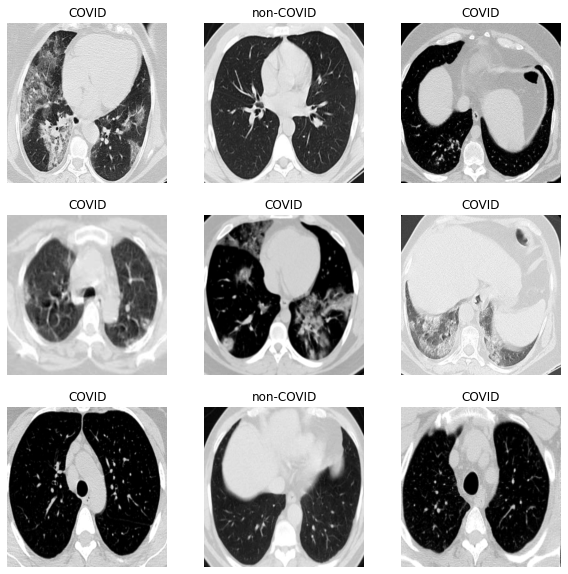

In [7]:
plt.figure(figsize=(10, 10))
a = 0
b1 = np.random.randint(0, 76)
for images, labels in ds_train.take(b1):
    for i in range(9):
        plt.subplot(3, 3, 1+i)
        #print(images[i].numpy())
        plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis("off")
    break
            
plt.show()

In [8]:
for img_batch, labels_batch in ds_train:
    print(img_batch.shape)
    print(labels_batch.shape)
    break

(32, 300, 300, 1)
(32,)


In [9]:
num_classes = 2

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(300, 300, 1)),
    layers.Conv2D(16, 3, padding='same', activation=tf.nn.relu, strides=1),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(0.4),
    layers.Conv2D(64, 3, padding='same', activation='relu', strides=2),
    #layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(0.4),
    #layers.Conv2D(256, 3, padding='same', activation='relu'),
    #layers.MaxPool2D(pool_size=(2, 2)),
    #layers.Dropout(0.4),
    layers.Conv2D(256, 3, padding='same', activation='relu', strides=2),
    layers.Dropout(0.4),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 300, 300, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 300, 300, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        9280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 256)       1

In [12]:
epochs = 40
training = model.fit(
    ds_train,
    validation_data=ds_validation,
    epochs=epochs
)

Epoch 1/40
63/63 [==============================] - 9s 61ms/step - loss: 0.9998 - accuracy: 0.4741 - val_loss: 0.9298 - val_accuracy: 0.5121
Epoch 2/40
63/63 [==============================] - 3s 53ms/step - loss: 0.7452 - accuracy: 0.5118 - val_loss: 0.7824 - val_accuracy: 0.5121
Epoch 3/40
63/63 [==============================] - 3s 53ms/step - loss: 0.7423 - accuracy: 0.4982 - val_loss: 0.8010 - val_accuracy: 0.4879
Epoch 4/40
63/63 [==============================] - 3s 53ms/step - loss: 0.6992 - accuracy: 0.5607 - val_loss: 0.7533 - val_accuracy: 0.5181
Epoch 5/40
63/63 [==============================] - 3s 54ms/step - loss: 0.6906 - accuracy: 0.5829 - val_loss: 0.7015 - val_accuracy: 0.5282
Epoch 6/40
63/63 [==============================] - 3s 53ms/step - loss: 0.6474 - accuracy: 0.6398 - val_loss: 0.5915 - val_accuracy: 0.7097
Epoch 7/40
63/63 [==============================] - 3s 53ms/step - loss: 0.5921 - accuracy: 0.7043 - val_loss: 0.5728 - val_accuracy: 0.7137
Epoch 8/40
63

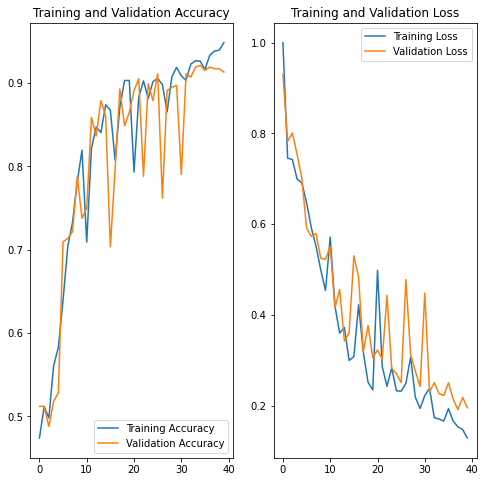

In [13]:
#model = keras.models.load_model("nn.h5")
acc = training.history['accuracy']
val_acc = training.history['val_accuracy']

loss = training.history['loss']
val_loss = training.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
a = 0
b = 0
c = 0
for images, labels in ds_validation:
    c += 1
    for i in range(32):
        prediction = model.predict(images)
        score = tf.nn.softmax(prediction[i])
        if class_names[np.argmax(score)] == class_names[labels[i]]:
            #print(("yes"))
            a += 1
        else: b += 1
    if c == 15:
        break
print(a)
print(b)
print(100*(a/(a+b)))
        

439
41
91.45833333333333


In [18]:
path_to_model = r'C:/Users/utkar/Desktop/ML/tensorflow/image classification/ctscan.tf'
tf.keras.models.save_model(
    model,
    path_to_model,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True
)

INFO:tensorflow:Assets written to: C:/Users/utkar/Desktop/ML/tensorflow/image classification/ctscan.tf\assets
